In [1]:
import sys

sys.path.append("../../")  # make imports from src easy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from src import Value
from src import draw_dot, trace
from src import MLP 
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from IPython.display import clear_output


In [3]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))



In [4]:
RANDOM_STATE = 42
random.seed(RANDOM_STATE)

In [5]:
df = pd.read_csv("../../data/apple_quality.csv")

In [6]:
# prepare data
# df = df.sample(frac=0.2, random_state=RANDOM_STATE)  # get only fraction of the dataset
df = df.dropna()  # remove rows that include NaNs
df["Quality"] = df["Quality"].apply(
    lambda x: 1 if x == "good" else 0
)  # good -> 1; bad -> 0
df = df.drop(columns=["A_id"], errors="ignore")

df["Acidity"] = df["Acidity"].astype("float64")

In [7]:
shuffled_df = shuffle(
    list(zip(np.array(df.loc[:, df.columns != "Quality"]), np.array(df["Quality"]))),
    random_state=RANDOM_STATE,
)
X, y = [t[0] for t in shuffled_df],[t[1] for t in shuffled_df]

training_data_percent = 0.80
training_size = int(len(X) * training_data_percent)
testing_size = len(X) - training_size
X_train, y_train = X[:training_size], y[:training_size]
X_test, y_test = X[-testing_size:], y[-testing_size:]

In [8]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
def to_binary(result,threshold):
  return 1 if result.data > threshold else 0

In [10]:
# Define a Model
number_of_inputs = len(X_train_scaled[0])
number_of_outputs_for_each_layer = [4, 4, 1]

mlp = MLP(
    nin=len(X_train_scaled[0]),
    nouts=number_of_outputs_for_each_layer,
    act_func="ReLU"
)
losses = []
total_number_of_epochs = 0

In [11]:
# Train a Model
number_of_epochs = 10
threshold = 0.5


for epoch in range(number_of_epochs + 1):
    # clear_output()
    print(f"Training: {(epoch / number_of_epochs) * 100}%")
    # Forward pass
    actual_ys = [sigmoid(mlp(x)) for x in X_train_scaled] # use sigmoid function
    loss: Value = sum(
        (expected_y - actual_y) ** 2
        for expected_y, actual_y in zip(y_train, actual_ys)
    )

    print(f"Loss at epoch {epoch}: {loss}")
    # Collect all losses
    losses.append(loss.data)

    total_number_of_epochs += 1
    # zero grad
    mlp.zero_grad()
    # Backward pass
    loss.backward()

    for p in mlp.parameters():
        p.data += -0.001 * p.grad

Training: 0.0%
Loss at epoch 0: Value(data=1263.0681649973842, grad=0)
Training: 10.0%
Loss at epoch 1: Value(data=1133.1770300460685, grad=0)
Training: 20.0%
Loss at epoch 2: Value(data=991.2263035753474, grad=0)
Training: 30.0%
Loss at epoch 3: Value(data=858.1573370217681, grad=0)
Training: 40.0%
Loss at epoch 4: Value(data=794.1162700853394, grad=0)
Training: 50.0%
Loss at epoch 5: Value(data=770.231576718844, grad=0)
Training: 60.0%
Loss at epoch 6: Value(data=752.3896384717322, grad=0)
Training: 70.0%
Loss at epoch 7: Value(data=735.42754581419, grad=0)
Training: 80.0%
Loss at epoch 8: Value(data=718.1425714773965, grad=0)
Training: 90.0%
Loss at epoch 9: Value(data=700.196451612116, grad=0)
Training: 100.0%
Loss at epoch 10: Value(data=682.0790044927226, grad=0)


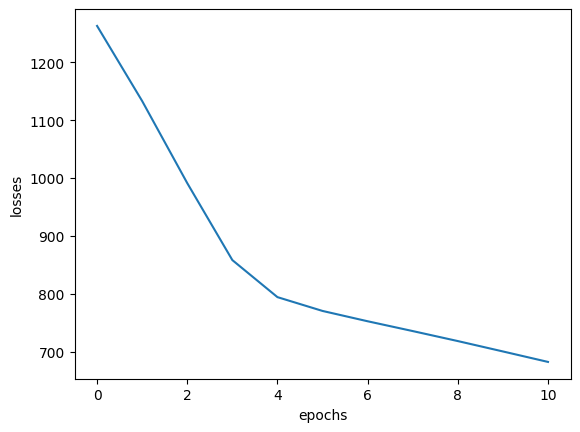

In [12]:
plt.plot(range(total_number_of_epochs), losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()

In [13]:
# Test a Model
results = [sigmoid(mlp(x)) for x in X_test_scaled]

actual = results
print(min([v.data for v in results]))


accuracy = (
    sum(
        [
            1 if (to_binary(results[i],threshold)) == y_test[i] else 0
            for i in range(len(results))
        ]
    )
    / len(y_test)
) * 100


for i, result in enumerate(results):
    print(f"#{i} | Target: {y_test[i]} | Actual: {1 if results[i].data > threshold else 0}")
print(f"Total accuracy: {accuracy}")

0.021458705543241852
#0 | Target: 0 | Actual: 0
#1 | Target: 0 | Actual: 0
#2 | Target: 1 | Actual: 1
#3 | Target: 0 | Actual: 1
#4 | Target: 1 | Actual: 1
#5 | Target: 0 | Actual: 0
#6 | Target: 0 | Actual: 1
#7 | Target: 1 | Actual: 0
#8 | Target: 1 | Actual: 1
#9 | Target: 0 | Actual: 0
#10 | Target: 1 | Actual: 1
#11 | Target: 1 | Actual: 1
#12 | Target: 1 | Actual: 1
#13 | Target: 1 | Actual: 1
#14 | Target: 1 | Actual: 1
#15 | Target: 0 | Actual: 0
#16 | Target: 0 | Actual: 1
#17 | Target: 1 | Actual: 1
#18 | Target: 0 | Actual: 0
#19 | Target: 0 | Actual: 0
#20 | Target: 1 | Actual: 1
#21 | Target: 0 | Actual: 1
#22 | Target: 0 | Actual: 1
#23 | Target: 0 | Actual: 0
#24 | Target: 1 | Actual: 1
#25 | Target: 1 | Actual: 0
#26 | Target: 1 | Actual: 1
#27 | Target: 1 | Actual: 1
#28 | Target: 0 | Actual: 0
#29 | Target: 0 | Actual: 0
#30 | Target: 1 | Actual: 1
#31 | Target: 1 | Actual: 1
#32 | Target: 0 | Actual: 0
#33 | Target: 0 | Actual: 0
#34 | Target: 0 | Actual: 0
#35 | Tar

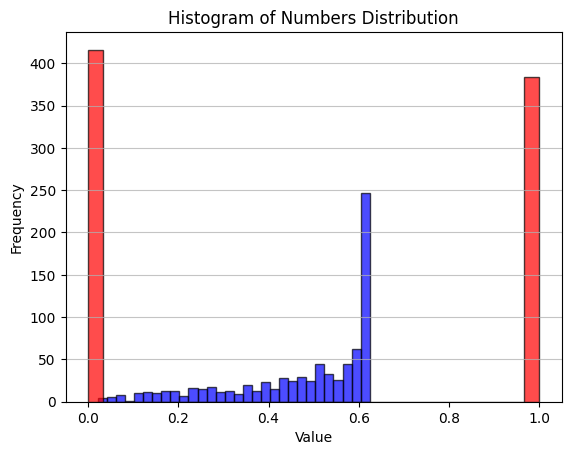

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
data = [v.data for v in results]

# Create a histogram
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.hist(y_test, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Histogram of Numbers Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
